Understanding the data :
 - Handle missing data
 - Categorical Encoding
 - Feature Scaling
 - Outlier Detection

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression



Filename="Student_performance_data .csv" #importing .csv file using pandas
df=pd.read_csv(Filename)

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [264]:
df.drop(columns='StudentID')

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [265]:
output='GradeClass'
features=df.columns.drop([output,'StudentID']).tolist()
print(features)

['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']


- Checking for Missing values

In [ ]:
print("Missing Values in the dataset:")
display( df.isnull().sum())

Missing Values in the dataset:


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

- Categorical Encoding

In [ ]:
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
le = LabelEncoder() #Label Encoder to convert categorical variables into numerical values
for columns in categorical_cols:
    df[columns] = le.fit_transform(df[columns])

- Feature Scaling

In [ ]:
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
scaler = MinMaxScaler() #MinMaxScaler to scale the numerical variables between 0 and 1
df_minmax = df.copy()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns]) 

print("Min-Max Scaled Data (First 5 rows):")
display(df_minmax[numerical_columns].head())
print("\nMin-Max Scaled Stats:")
display(df_minmax[numerical_columns].describe().T)


Min-Max Scaled Data (First 5 rows):


,Age,StudyTimeWeekly,Absences,GPA
0,17,19.833723,7,2.929196
1,18,15.408756,0,3.042915
2,15,4.210570,26,0.112602
3,17,10.028829,14,2.054218
4,17,4.672495,17,1.288061



Min-Max Scaled Stats:


,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
GPA,2392.0,1.906186,0.915156,0.000000,1.174803,1.893393,2.622216,4.000000


- Outlier detection using IQR method

In [ ]:
#outlier detection using IQR method
print("Initial number of rows: ", len(df))

def remove_outliers(df, column): # Function to remove outliers using IQR method
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_rows = len(df)
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] 
    print(f"\nRemoving outliers for {column}:")
    print(f"Q1: {Q1:.2f} \nQ3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Rows before: {initial_rows}, Rows after: {len(df_filtered)}")
    return df_filtered

initial_rows = len(df) 
for col in numerical_columns:
    df = remove_outliers(df, col)
    if len(df) < 0.9 * initial_rows:
        print(f"Warning: Significant data loss after removing outliers for {col}.")

print('\nFinal number of rows after outlier removal:', len(df))
print("\nSummary of numerical columns after outlier removal:\n", df[numerical_columns].describe().T)

Initial number of rows:  2392

Removing outliers for Age:
Q1: 0.00 
Q3: 0.67
IQR: 0.67
Lower bound: -1.00
Upper bound: 1.67
Rows before: 2392, Rows after: 2392

Removing outliers for StudyTimeWeekly:
Q1: 0.25 
Q3: 0.72
IQR: 0.47
Lower bound: -0.45
Upper bound: 1.42
Rows before: 2392, Rows after: 2392

Removing outliers for Absences:
Q1: 0.24 
Q3: 0.76
IQR: 0.52
Lower bound: -0.53
Upper bound: 1.53
Rows before: 2392, Rows after: 2392

Removing outliers for GPA:
Q1: 0.29 
Q3: 0.66
IQR: 0.36
Lower bound: -0.25
Upper bound: 1.20
Rows before: 2392, Rows after: 2392

Final number of rows after outlier removal: 2392

Summary of numerical columns after outlier removal:
                   count      mean       std  min       25%       50%  \
Age              2392.0  0.489548  0.374599  0.0  0.000000  0.333333   
StudyTimeWeekly  2392.0  0.489108  0.282964  0.0  0.252391  0.485773   
Absences         2392.0  0.501427  0.291980  0.0  0.241379  0.517241   
GPA              2392.0  0.476547  0.2287

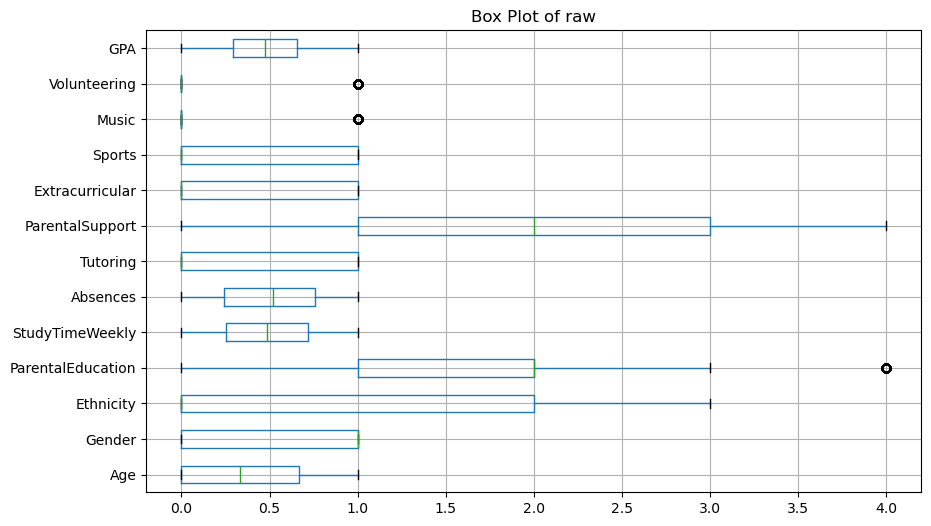

In [270]:
fig, ax=plt.subplots(figsize=(10, 6))
boxplot=df[features].boxplot(vert=0,ax=ax)
_=ax.set_title(f'Box Plot of raw')

In [3]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()  # or StandardScaler()
# df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']] = scaler.fit_transform(df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']])

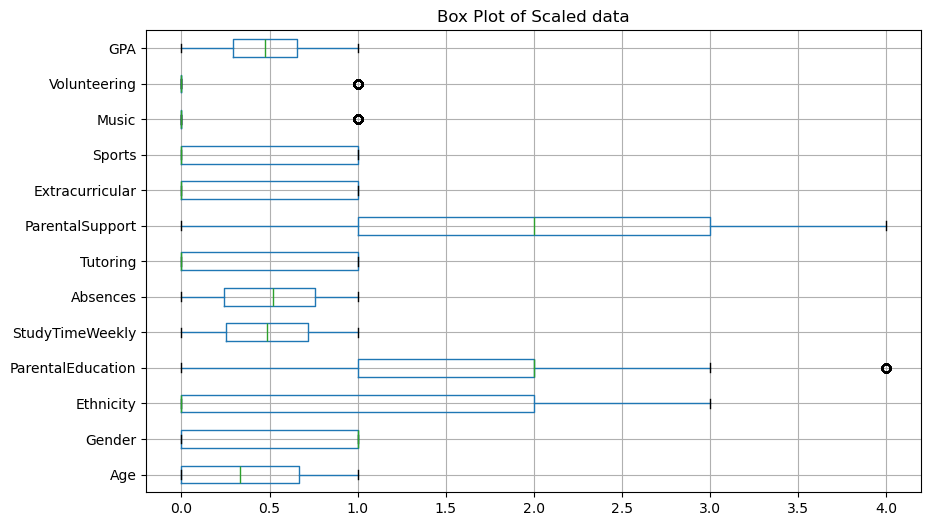

In [273]:
fig, ax=plt.subplots(figsize=(10, 6))
boxplot=df[features].boxplot(vert=0,ax=ax)
_=ax.set_title(f'Box Plot of Scaled data')

In [274]:
#df = df[df["Volunteering"] <= 0.5] #remove outliers
#df["Volunteering"]=df["Volunteering"]


In [275]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["ParentalEducation"].quantile(0.25)
Q3 = df["ParentalEducation"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df["ParentalEducation"] >= lower_bound) & (df["ParentalEducation"] <= upper_bound)]

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   float64
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   float64
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(5), int64(10)
memory usage: 280.4 KB


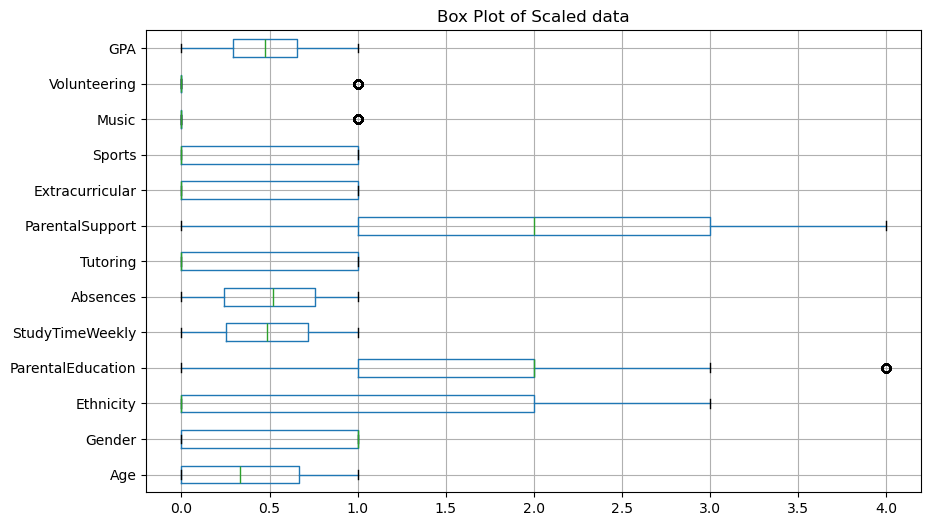

In [277]:
fig, ax=plt.subplots(figsize=(10, 6))
boxplot=df[features].boxplot(vert=0,ax=ax)
_=ax.set_title(f'Box Plot of Scaled data')

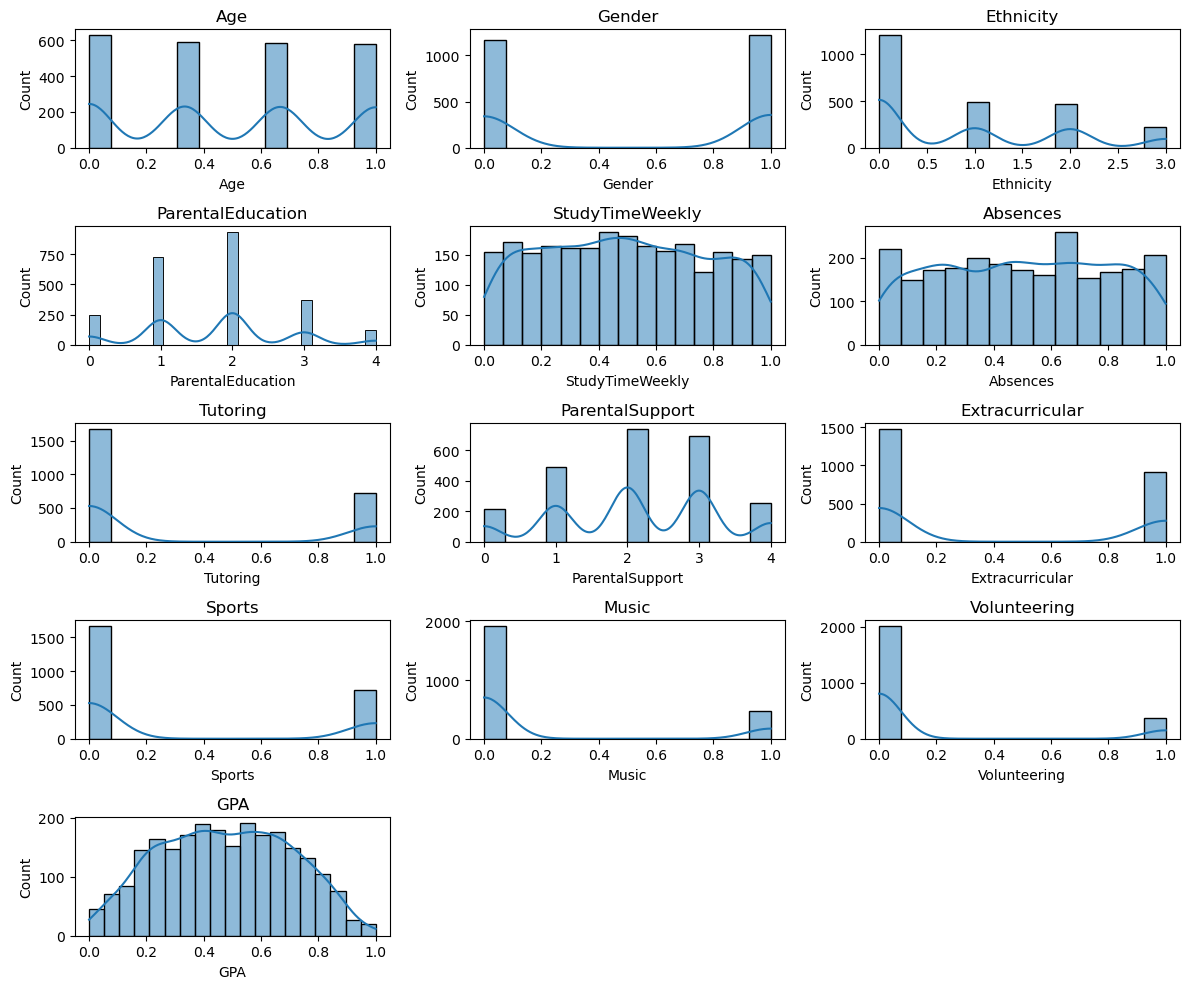

In [278]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(features):

    plt.subplot(math.ceil(len(features) / 3), 3, i + 1)

    sns.histplot(df[col], kde=True)

    plt.title(col)

plt.tight_layout()

plt.show()